In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from msslib.utils import *
from msslib.data import *

import random

In [3]:
unwanted_recto = ["VA223RN","VA327RN","VA001RN","VA002RN","VA006RN","VA007RN","VA008RN","VA009RN"]

def get_set_paths(directory):
    return sorted(list(filter(lambda x: "RN" in x and not any(s in x for s in unwanted_recto) , listpaths(directory))))

In [4]:
label_dir = "/home/finlay/HMT/data/VenetusA/1200Hx900W/10blocks/labels/"
data_dir = "/home/finlay/HMT/data/VenetusA/1200Hx900W/10blocks/data/"    

label_paths = get_set_paths(label_dir)
data_paths = get_set_paths(data_dir)

path_pairs = list(zip(label_paths, data_paths))
print(len(path_pairs))

test_runs = ["A","B","C","D","E","F"]

150


In [6]:
for letter in test_runs:
    split_at = 50
    random.shuffle(path_pairs)
    train = path_pairs[:split_at]
    test = path_pairs[split_at:]
    clf = NearestCentroid()
    lda = LinearDiscriminantAnalysis()
    print("Training LDA %s" %letter)
    for l, d in train:
        X = flatten_vector_matrix(np.load(d))
        y = np.squeeze(flatten_vector_matrix(np.load(l)))
        lda.fit(X, y)
    
    print("Training %s" %letter)
    for l, d in train:
        X = lda.transform(flatten_vector_matrix(np.load(d)))
        y = np.squeeze(flatten_vector_matrix(np.load(l)))
        clf.fit(X, y)
        
    print("Testing %s" %letter)
    test_results = []
    for l, d in test:
        X = lda.transform(flatten_vector_matrix(np.load(d)))
        y = np.squeeze(flatten_vector_matrix(np.load(l)))
        pred = clf.predict(X)
        test_results.append({
            'name': only_basename(l),
            'pred': pred.reshape(120,90),
            })
    oot_path = os.path.join("/home/finlay/HMT/data/VenetusA/1200Hx900W/10blocks/LDA_nearest_centroid/", letter)
    mkdir(oot_path)
    print("Saving %s" %letter)
    for result in test_results:
        path = format_path(oot_path, 'npy', result['name'])
        np.save(path, scale_matrix(result['pred'], 10))

Training LDA A


/usr/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Training A
Testing A
Saving A
Training LDA B
Training B
Testing B
Saving B
Training LDA C
Training C
Testing C
Saving C
Training LDA D
Training D
Testing D
Saving D
Training LDA E
Training E
Testing E
Saving E
Training LDA F
Training F
Testing F
Saving F


In [20]:
np.unique(test_results[40]['pred'])

array([ 0.,  1.,  2.,  3.,  4.])

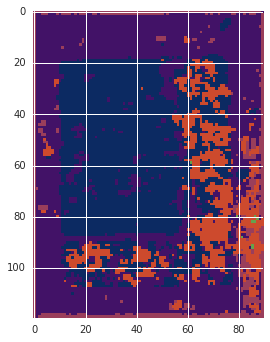

In [11]:
plt.imshow(label_colour_image(test_results[22]['pred']), interpolation='nearest')